In [2]:
%matplotlib inline
import matplotlib.pyplot as plt, seaborn as sn
import numpy as np
sn.set_context('notebook')

### Sigmoid function

For limiting soil water drainage when water level drops below field capacity. Q = (V/T) * f(V)

The 'steepness' of the rise is dependent on the 'b' parameter. When b=1, have a steep rise, i.e. essentially a threshold with no runoff below field capacity (f(v) = 0), and f(V) = 1 above.

However, if want to have some runoff to the stream and percolation to groundwater when the soil water level drops below field capacity, could decrease the b shape parameter. However, it mustn't be so small that f(V) > 0 when V = 0. How much to decrease it by to get the desired shape?

Field capacity is in the range 100 - 450 mm/m (sand to clay) [soil moisture range chart saved to M, Data, Soils]. Therefore plot f(V) for the upper and lower limits of field capacity with a variety of values of 'b'


When Vs = 0, b= 0.02, f_V = 0.11920
When Vs = 0, b= 0.04, f_V = 0.01799
When Vs = 0, b= 0.06, f_V = 0.00247
When Vs = 0, b= 0.08, f_V = 0.00034
When Vs = 0, b= 0.10, f_V = 0.00005


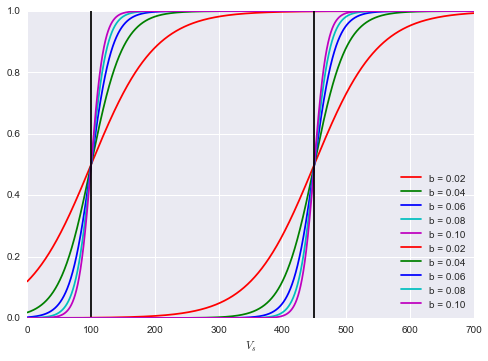

In [34]:
# Sigmoid function for limiting soil water drainage when water level drops below field capacity

fcs = [100., 450.] # 'True' field capacity (mm)
# fc = 3*(tfc/4)
bs = np.arange(0.02, 0.12, 0.02)
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']

for fc in fcs: 
    for idx, b in enumerate(bs):
        f_Vs = 1/(1 + np.exp(b*(fc - Vs)))
        plt.plot(Vs, f_Vs, color=c[idx], label='b = %.2f' %b)
        if fc == 100:
            # Check the value of f_Vs when Vs = 0:
            f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
            print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(fc, c='k')
plt.xlabel('$V_s$')
plt.legend(loc='best')
plt.show()


An alternative approach is to shift the curves leftwards relative to field capacity, so that don't have moisture limitation beginning until field capacity.

When Vs = 0, b= 0.02, f_V = 0.11920
When Vs = 0, b= 0.04, f_V = 0.01799
When Vs = 0, b= 0.06, f_V = 0.00247
When Vs = 0, b= 0.08, f_V = 0.00034
When Vs = 0, b= 0.10, f_V = 0.00005
When Vs = 0, b= 0.12, f_V = 0.00001


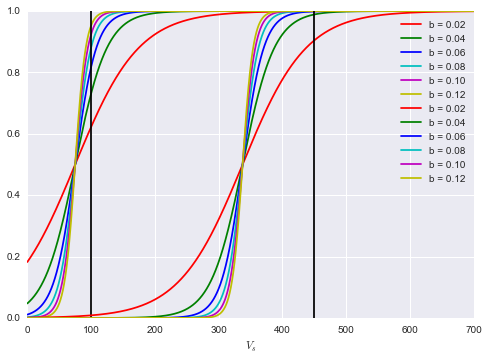

In [45]:
tfcs = np.array([100., 450.]) # 'True' field capacity (mm)
fcs = 3*(tfcs/4.)
bs = np.arange(0.02, 0.14, 0.02)
Vs = np.arange(0, 700, 0.1)
c = ['r','g','b','c','m','y']

for ii, fc in enumerate(fcs): 
    for jj, b in enumerate(bs):
        f_Vs = 1/(1 + np.exp(b*(fc - Vs)))
        plt.plot(Vs, f_Vs, color=c[jj], label='b = %.2f' %b)
        if ii == 0:
            # Check the value of f_Vs when Vs = 0:
            f_Vs0 = 1/(1 + np.exp(b*(100 - 0)))
            print 'When Vs = 0, b= %.2f, f_V = %.5f' %(b, f_Vs0)
    plt.axvline(tfcs[ii], c='k')
plt.xlabel('$V_s$')
plt.legend(loc='best')
plt.show()

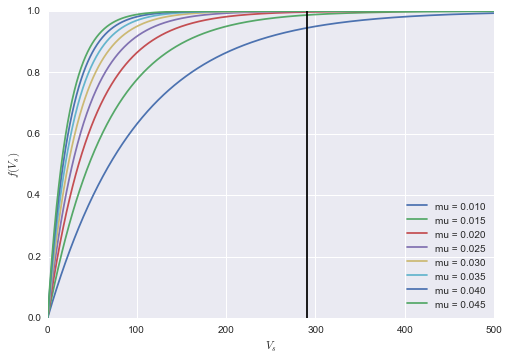

In [4]:
# Exponential of 'Tessier'
mus = np.arange(0.01, 0.05, 0.005) # Selection of values for mu
Vs = np.arange(0, 500, 0.5)        # Vs from 0 to above field capacity
fc = 290  # Field capacity (mm)

# Loop over mu values
for mu in mus:
    f_Vs = 1 - np.exp(-mu*Vs)
    plt.plot(Vs, f_Vs, label='mu = %.3f' % mu)

plt.axvline(fc, c='k')
plt.legend(loc='best')
plt.ylabel('$f(V_s)$')
plt.xlabel('$V_s$')
plt.show()